<a href="https://colab.research.google.com/github/COFAlumni-USB/Physics-REBoot-Applied-Science-Bootcamp/blob/main/Resultados_Hands-On_Estudiantes/Dia%201/Epidemiologia_Leonardo_Manrique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src='https://static.wixstatic.com/media/42c521_bbcac1847d1a46739c6ccb446a2be592~mv2.png/v1/fill/w_490,h_189,al_c,q_85,usm_0.66_1.00_0.01/20210730_website_header.webp' width="1000" />
</p>

<font size="6">Actividades Hand-Ons</font>


<font size="12">Modelaje matemático de epidemias</font>

# Modelo SIR

Actualmente nos encontramos en el 2021 después de estar 18 meses confinados a estar en casa debido a una enfermedad extremadamente contagiosa llamada COVID-19. 

A continuación se presenta el modelo matemático determinista **SIR** (**S**uceptible, **I**nfeccioso, **R**ecobrado)  desarrollado en el [1927 por W.O Kermack y A.G. McKendrick](https://doi.org/10.1098/rspa.1927.0118)


Este modelo describe la evolución temporal de una enfermedad considerando solamente 3 posibles estados para los individuos:

* **S(t)**: Representa a los individuos **Suceptibles**, es decir aquellas personas que pueden ser infectadas al entrar en contacto con la enfermedad.

* **I(t)**: Representa a los individuos **Infectados**, es decir aquellas personas portadoras de la enfermedad y que pueden contagiar a personas del grupo **S**.

* **R(t)**: Representa a los individuos **Recobrados**, es decir aquellas personas que ya fueron infectadas y se recobraron, es decir, que no estan en condiciones de transmitir la enfermedad ni de enfermarse nuevamente.

Las transiciones entre los grupos esta definidad de la siguiente manera:

$$ S \rightarrow I \rightarrow R$$

Una persona primero es suceptible a la enfermedad **S** luego se infecta **I** y por último, se recobra **R**.
La tasa de transmisión esta determinada por la constante $\beta$, la de recuperación por la constante $\gamma$.
 
Dada una población fija, $ N = S(t)+ I(t) + R(t) $, las 3 ecuaciones diferenciales presentadas a continuación, describen el modelo:

$$ \frac{dS}{dt}= -\cfrac{\beta S(t)I(t)}{N} $$

$$ \frac{dI}{dt}= \cfrac{\beta S(t)I(t)}{N} - \gamma I(t)$$

$$ \frac{dR}{dt}=  \gamma I(t)$$

En esta ocasión, nuestra tarea es:

* Crear nuestra propia implementación en Python del *modelo SIR* usando las ecuaciones diferenciales presentadas anteriormente para un período de tiempo de 100 dias.
* Ilustrar gráficamente la evolución de **S**, **I**, **T** en función del tiempo.

Existen varias maneras de realizar esto. Por ahora, pondremos en práctica los conocimientos aprendidos en **introducción a python**, **pensamiento algorítmico** así como las librerías **numpy** y **matplotlib**.

Empezemos por cargar las librerías que usaremos:

<div class="alert alert-block alert-info">

**Objetivo** : Importa las siguientes librerías y funciones
    
1. NumPy con pseudónimo np
2. La función odeint de scipy.integrate
3. Matplotlib.pyplot con pseudónimo plt

</div>

In [ ]:
#Puedes ayudarte con los siguientes comandos
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info">

**Objetivo** : Define los parámetros iniciales
    
*   Población total **N=1000**
*   Número inicial de personas infectadas **I0=1**
*   Número inicial de individuos recuperados **R0=0**
*   Número inicial de personas susceptibles **S0= N - I0 - R0**
*   La tasa de contacto esta definida por la constante $\beta=0.2$
*   La tasa de recuperación esta definida por la constante $\gamma= 1/10$ 

</div>

In [ ]:
N = 1000

a, b = 1, 0

I0, R0 = 1, 0
S0 = N - I0 - R0

beta, gamma = 0.2, 1/10

Ahora que definimos todos los parámetros iniciales, es necesario definir t, para describir la evolución temporal de la función. En este caso utilizamos la función np.linspace que produce un array con **Num** cantidad de puntos entre los valores **start** y **stop**.

In [ ]:
Total_dias = 160

start = 1
stop = Total_dias
num = 160 

# Inicializamos el array 1D: 

t = np.linspace(0, Total_dias, num) 

El modelo SIR esta representado por un sistema de ecuaciones diferenciales. Para resolverlo es necesario definir las funciones del modelo (como vector) y el vector de condiciones iniciales de la siguiente manera:

\begin{equation}
\vec{Y}(t) =  \begin{bmatrix}
           S \\
           I \\
           R
         \end{bmatrix}
\end{equation}        

\begin{equation}
 \vec{f}(t, \vec{Y}) =  \begin{bmatrix}
           \cfrac{\text{d}S}{\text{d} T} = -\cfrac{\beta S(t)I(t)}{N} \\
           \cfrac{\text{d}I}{\text{d} T} = \cfrac{\beta S(t)I(t)}{N} - \gamma I(t)\\
           \cfrac{\text{d}R}{\text{d} T} = \gamma I(t)
         \end{bmatrix} 
\end{equation}    

\begin{equation}
 \vec{Y}(t_o) =  \begin{bmatrix}
           S(t_o) = S0 \\
           I(t_o) = I0\\
           R(t_o) = R0
         \end{bmatrix} 
\end{equation}

In [ ]:
 #primero definimos la funcion a resolver y la variable independiente, luego colocamos las constantes
def SIR(y, t, N, beta, gamma):
   
     S, I, R = y

     #Las funciones cada una en una linea de codigo diferente
    
     dSdt = -beta*S*I / N
     dIdt = beta*S*I / N - gamma*I
     dRdt = gamma*I
     
     # utilizamos el comando return para que nos devuelva un vector con las funciones como coordenadas (separadas por una coma)

     return dSdt, dIdt, dRdt
       
    
# Ahora hacemos un vector con las condiciones iniciales definidas al principio 
y0 = S0, I0, R0

¡Lo único que queda por hacer es resolver las ecuaciones diferenciales! pero esto lo podemos hacer automáticamente con la función ***scipy.integrate.odeint** or ***scipy.integrate.solve_ivp**, esta función ya la importamos al comienzo.

In [ ]:
ret = odeint(SIR, y0, t, args=(N, beta, gamma))
S, I, R= ret.T    

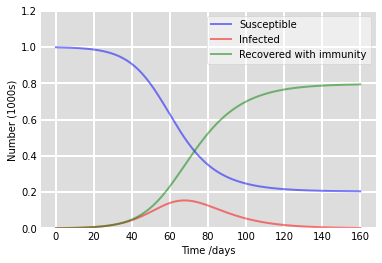

In [ ]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible') #Variable S vs t
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected') # Variable I vs t
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity') #Variable R vs t

ax.set_xlabel('Time /days') #titulo del eje X
ax.set_ylabel('Number (1000s)') #titulo eje y
ax.set_ylim(0,1.2) #min z max del eje Y
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'): 
    ax.spines[spine].set_visible(False)
    
plt.show()

# Modelo SEIR

El modelo SEIR divide la población en 4 categorías en vez de 3. 
Las definiciones de los grupos **S**, **I**, **R** permanecen como en la sección anterior, la diferencia es que se introduce un nuevo grupo **E** el cual representa las personas expuestas, las cuales son portadores de la enfermedad pero no presentan síntomas. En este caso la transición de un grupo a otro esta dada por:

$ S \rightarrow E \rightarrow I \rightarrow R$

Una persona primero es suceptible a la enfermedad **S** luego se contagia y se encuentra en período de incubación asociado con su respectiva tasa $\alpha$ pasando al grupo de personas expuestas **E** antes de infectarse y pasar al grupo **I** y por último, se recobra **R**.
 
Es posible agregar al modelo las tasas de natalidad $\nu$ y mortalidad $\mu$. En este caso, la población total **N** no es constante $ N(t) = S(t)+ E(t) + I(t) + R(t) $. En vez de tener 3 ecuaciones diferenciales tenemos 4:

$ \cfrac{dS}{dt}= -\beta S(t)I(t) + \nu N(t) - \mu S(t) $

$ \cfrac{dE}{dt}= \beta S(t)I(t) - \alpha E(t) - \mu E(t)$

$ \cfrac{dI}{dt}= \alpha E(t) - \gamma I(t) -\mu I(t)$

$ \cfrac{dR}{dt}=  \gamma I(t) - \mu R(t)$

En esta ocasión, nuestra tarea es:

* Modificar la implementación en Python del *modelo SIER* usando las ecuaciones diferenciales presentadas anteriormente para un período de tiempo de 100 dias.
* Ilustrar gráficamente la evolución de **S**, **I**, **E**, **R**, **N** en función del tiempo.

Procedemos de la misma manera que con el ejercicio anterior, ya que las funciones y librerías a ser utilizadas son las mismas:

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info">

**Objetivo** : Repetir
    
Hay que repetir los pasos realizados durante el caso de modelo SIR ahora en el modelo SEIR.

</div>

Definimos las nuevas constantes presentes en el nuevo set de ecuaciones, las cuales son:

- tasa de infección: $\beta$ 

- tasa de recuperación: $\gamma$

- tasa de mortalidad: $ \mu$

- tasa de natalidad: $ \nu $

- tasa de incubación: $ \alpha_1$

Además, definimos una población inicial de N=1000, así como el número inicial de personas expuestas **E0=0**, infectadas **I0=1** y recuperadas **R0=0**. Todas las demas personas pertenecen al grupo suceptible: **S0= N - E0 - I0 - R0**

Finalmente, definimos el grid que en este caso es el eje X el cual consiste en los dias. 

In [ ]:
N = 1000
E0, I0,R0 = 0, 1, 0
S0 = N - E0 - I0 - R0 

beta =0.09
gamma=0.0001
mu=0.015
nu=0.02
alpha =0.03

Tamano_grid = 100
Step = 100
t = np.linspace(0, Tamano_grid, Step)

Ahora, después de definir todas las constantes y condiciones iniciales, construimos una función la cual engloba todas las ecuaciones diferenciales del modelo SEIR presentado anteriormente. En el argumento de la función se define primero y, t, luego todas las constantes. No importa que ahora sean 4 ecuaciones en vez de 3.

In [ ]:
def SEIR(y, t, N, beta, gamma, mu, nu, alpha):
    S, E, I, R = y
    dSdt = -beta * S * I + nu * N - mu * S
    dEdt = beta * S * I - alpha * E - mu * E
    dIdt = alpha * E - gamma * I - mu * I
    dRdt = gamma * I - mu * R

    return dSdt, dEdt, dIdt, dRdt

Ahora construimos el vector de condiciones iniciales y "llamamos" a la función, cuyo resultado decidimos nombrar **ret** para obtener las integrales de **dSdt, dEdt, dIdt, dRdt** en función del tiempo.

In [ ]:
y0 = S0, E0, I0, R0

ret = odeint(SEIR, y0, t, args=(N, beta, gamma, mu, nu, alpha))
S, E, I, R = ret.T

Finalmente hacemos el gráfico y ¡listo!

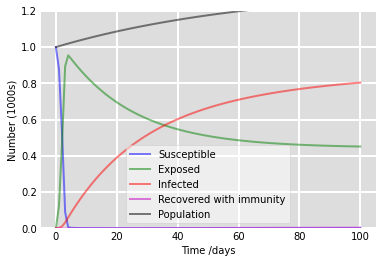

In [ ]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/1000, 'g', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'm', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, (S+E+I+R)/1000, 'k', alpha=0.5, lw=2, label='Population')

ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
plt.show()